<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_landmark_celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

from google.colab import drive
drive.mount('/content/drive')

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "43773aab623c4be288c3a279aa6ab764"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Quickstart variables // These variables are shared by several examples
local_landmark_path = "/content/drive/My Drive/images/landmark7.jpg"
local_celeb_path = "/content/drive/My Drive/images/celeb.jpg"

# Detect Domain-specific Content - local
# This example detects celebrites and landmarks in local images.
print("===== Detect Domain-specific Content - local =====")
local_image = open(local_celeb_path, "rb") # Open local image file containing a celebtriy

# Call API with the type of content (celebrities) and local image
detect_domain_results_celebs_local = computervision_client.analyze_image_by_domain_in_stream("celebrities", local_image)

# Print which celebrities (if any) were detected
print("Celebrities in the local image:")
if len(detect_domain_results_celebs_local.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_local.result["celebrities"]:
        print(celeb["name"])

# Open local image file containing a landmark
local_image_path_landmark = os.path.join (local_landmark_path)
local_image_landmark = open(local_landmark_path, "rb")
# Call API with type of content (landmark) and local image
detect_domain_results_landmark_local = computervision_client.analyze_image_by_domain_in_stream("landmarks", local_image_landmark)
print()

# Print results of landmark detected
print("Landmarks in the local image:")
if len(detect_domain_results_landmark_local.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmark_local.result["landmarks"]:
        print(landmark["name"])
print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
===== Detect Domain-specific Content - local =====
Celebrities in the local image:
Steve Jobs

Landmarks in the local image:
Taj Mahal



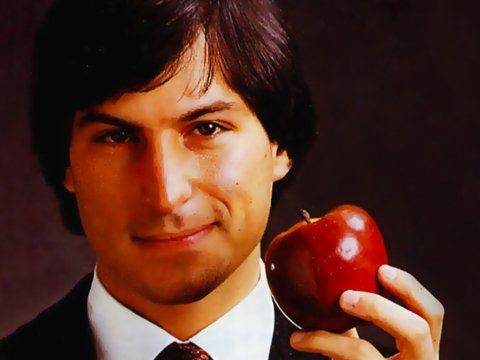

In [ ]:
# Read the image stored in the Google Drive // Local image file
from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_celeb_path)
cv2_imshow(img)

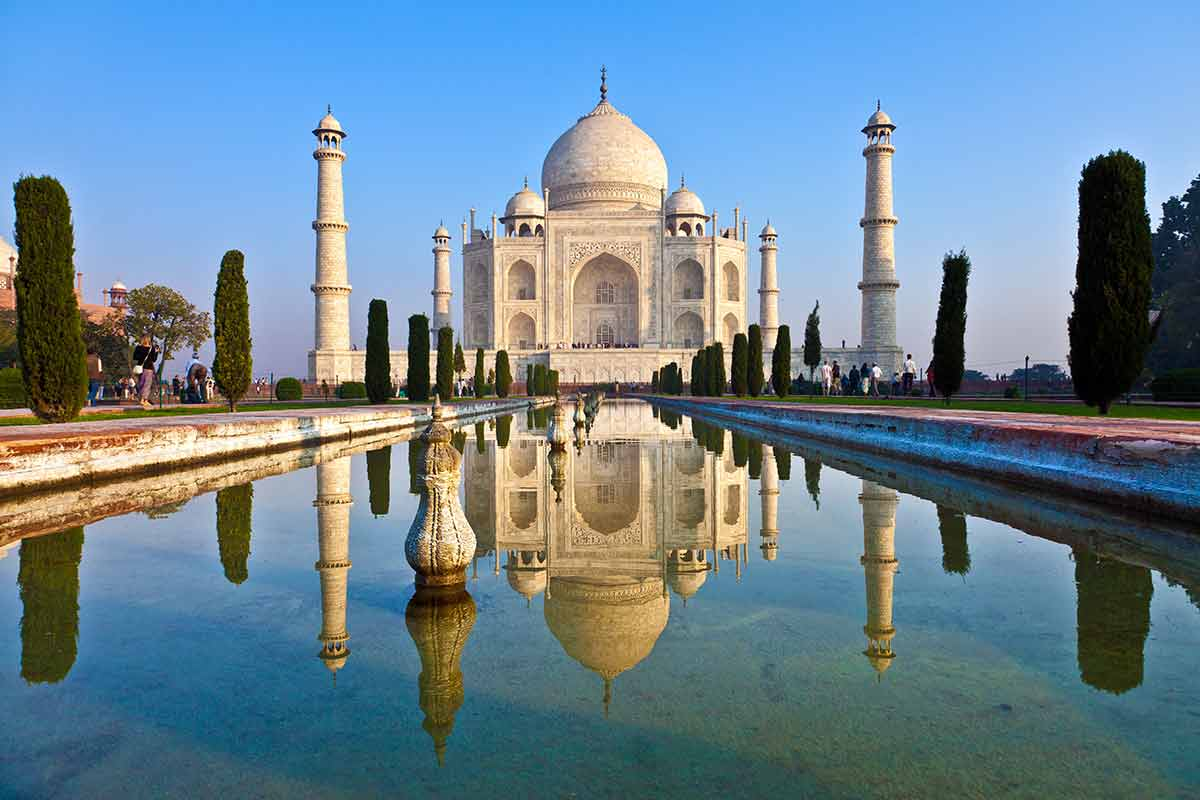

In [ ]:
# Read the image stored in the Google Drive // Local image file
from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_landmark_path)
cv2_imshow(img)